<a href="https://colab.research.google.com/github/AditiAgrawal95/CAECompressionSWinIRRestoration/blob/main/RGB_JPEG_Compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt
import matplotlib.cm as cm

In [132]:
def showImage(img):
  plt.figure(figsize=(15,15))
  plt.imshow(img)
  plt.xticks([]),plt.yticks([])
  plt.show

In [256]:
B = 8 # block size
image_name= 'img2.jpg'
img = cv2.imread('../content/drive/MyDrive/imagesFolder/'+image_name)
#img = cv2.imread('img6.png')

In [257]:
img.shape

(3000, 4000, 3)

In [258]:
height = len(img) # one column of image
width = len(img[0]) # one row of image

In [259]:
img=img[:height,:width]
img.shape

(3000, 4000, 3)

In [260]:
# Convert BGR to RGB 
img2 = np.zeros(img.shape,np.uint8)

In [261]:
img2.shape

(3000, 4000, 3)

In [262]:
img2[:,:,0] = img[:,:,2]
img2[:,:,1] = img[:,:,1]
img2[:,:,2] = img[:,:,0]

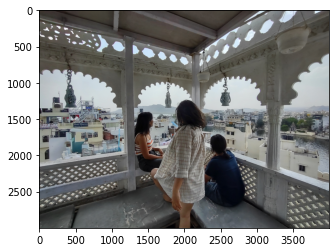

In [263]:
plt.imshow(img2)



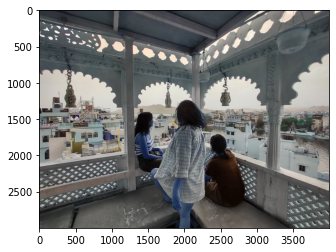

In [264]:
plt.imshow(img)

In [265]:
# Transfor BGR to YCrCb and subsample Chrominance Channels
transcol = cv2.cvtColor(img,cv2.COLOR_BGR2YCR_CB)


In [266]:
# CHrominance channel Cr and Cb are subsampled
# Before subsampling the chrominance channels are filtered using a (2x2) box filter (=average filter).
# After subsampling all 3 channels are stored in the list imSub:
SSV = 2  # Vertical subsampling
SSH = 2  # horicontal direction 
crf = cv2.boxFilter(transcol[:,:,1],ddepth = -1, ksize=(2,2))# ddpeth -1 is to use src.depth()
cbf = cv2.boxFilter(transcol[:,:,2],ddepth = -1, ksize=(2,2))


In [267]:
crf

array([[133, 133, 133, ..., 130, 130, 130],
       [133, 133, 133, ..., 130, 130, 130],
       [133, 133, 133, ..., 130, 130, 130],
       ...,
       [124, 124, 125, ..., 127, 127, 127],
       [124, 124, 125, ..., 127, 127, 127],
       [124, 124, 124, ..., 127, 127, 127]], dtype=uint8)

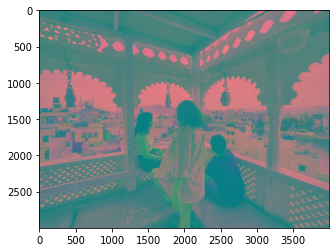

In [268]:
plt.imshow(transcol)

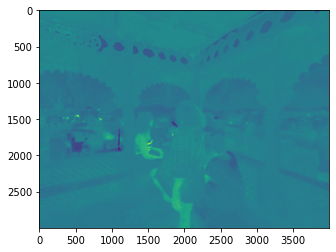

In [269]:
plt.imshow(transcol[:,:,1])

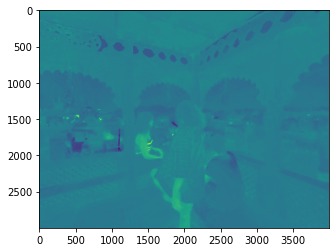

In [270]:
plt.imshow(crf)

In [271]:
crsub = crf[::SSV,::SSH]
cbsub = cbf[::SSV,::SSH]


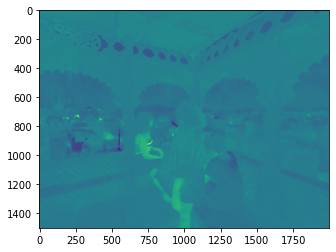

In [272]:
plt.imshow(crsub)

In [273]:
crsub.shape


(1500, 2000)

In [274]:
crf.shape

(3000, 4000)

In [275]:
imSub=[transcol[:,:,0],crsub,cbsub]

In [276]:
print(len(imSub[0]))
print(len(imSub[1]))
print(len(imSub[2]))
print(len(imSub))

3000
1500
1500
3


In [277]:
# Discrete Cosine Transform and Quantisation
# First the quantisation matrices for the luminace channel (QY) and the chrominance channels (QC)
# are defined, as proposed in the annex of the Jpeg standard.:

QY=np.array([[16,11,10,16,24,40,51,61],
                         [12,12,14,19,26,48,60,55],
                         [14,13,16,24,40,57,69,56],
                         [14,17,22,29,51,87,80,62],
                         [18,22,37,56,68,109,103,77],
                         [24,35,55,64,81,104,113,92],
                         [49,64,78,87,103,121,120,101],
                         [72,92,95,98,112,100,103,99]])

QC=np.array([[17,18,24,47,99,99,99,99],
                         [18,21,26,66,99,99,99,99],
                         [24,26,56,99,99,99,99,99],
                         [47,66,99,99,99,99,99,99],
                         [99,99,99,99,99,99,99,99],
                         [99,99,99,99,99,99,99,99],
                         [99,99,99,99,99,99,99,99],
                         [99,99,99,99,99,99,99,99]])

In [278]:
#From the quality factor the scale parameter is calculated. 
#The matrices defined above are multiplied by the scale parameter. 
#A low quality factor implies are large scale parameter. A large scale parameter yields a coarse quantisation,
# a low quality but a high compression rate. The list Q contains the 3 scaled quantisation matrices, which will be applied to the DCT coefficients:

QF=99.0
if QF < 50 and QF > 1:
  scale = np.floor(5000/QF)
elif QF < 100:
  scale = 200 - 2*QF
else:
  print ("Quality Factor must be in the range [1..99]")
scale = scale/100.0
Q=[QY*scale,QC*scale,QC*scale]


In the following loop DCT and quantisation is performed channel by channel. As defined in the standard, before DCT the pixel values of all channels are shifted by -128, such that the new value range is [-128,...127]. The loop iterates over the imSub-list, which contains the 3 channels. The result of the DCTs of the 3 channels are stored in 2-dimensional numpy arrays, which are put into the python list TransAll. Similarly the quantized DCT coefficients are stored in 2-dimensional numpy arrays, which are assigned to the python list TransAllQuant. Note that the channels have different shapes due to chrominance subsampling. In the last part of the loop the DCT coefficients of the previously selected and highlighted block are displayed:

Value of channelrows is:  3000
Value of channelcols is:  4000
Value of blocksV is:  375
Value of blocksH is:  500
Value of channelrows is:  1500
Value of channelcols is:  2000
Value of blocksV is:  187
Value of blocksH is:  250
Value of channelrows is:  1500
Value of channelcols is:  2000
Value of blocksV is:  187
Value of blocksH is:  250


"\n         selectedTrans=Trans[srow*B:(srow+1)*B,scol*B:(scol+1)*B]\n  else:\n      sr=np.floor(srow/SSV)\n      sc=np.floor(scol/SSV)\n      selectedTrans=Trans[sr*B:(sr+1)*B,sc*B:(sc+1)*B]\n  plt.imshow(selectedTrans,cmap=cm.jet,interpolation='nearest')\n  plt.colorbar(shrink=0.5)\n  plt.title('DCT of '+ch[idx])"

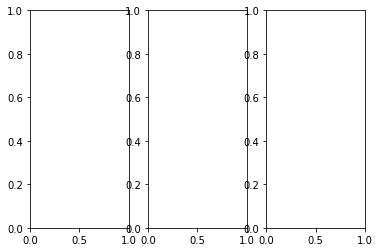

In [279]:
TransAll=[]
TransAllQuant = []
ch = ['Y','Cr','Cb']
plt.figure()
for idx,channel in enumerate(imSub):
  plt.subplot(1,3,idx+1)
  channelrows= channel.shape[0]
  print("Value of channelrows is: ", channelrows)
  channelcols = channel.shape[1]
  print("Value of channelcols is: ", channelcols)
  Trans = np.zeros((channelrows,channelcols),np.float32)
  TransQuant = np.zeros((channelrows,channelcols),np.float32)
  blocksV = np.int32(channelrows/B)
  print("Value of blocksV is: ", blocksV)
  blocksH = np.int32(channelcols/B)
  print("Value of blocksH is: ", blocksH)
  vis0=np.zeros((channelrows,channelcols),np.float32)
  vis0[:channelrows, :channelcols] = channel
  vis0=vis0-128
  for row in range(blocksV):
    for col in range(blocksH):
      currentBlock = cv2.dct(vis0[row*B:(row+1)*B,col*B:(col+1)*B])
      Trans[row*B:(row+1)*B,col*B:(col+1)*B] = currentBlock
      TransQuant[row*B:(row+1)*B,col*B:(col+1)*B]= np.round(currentBlock/Q[idx])
  TransAll.append(Trans)
  TransAllQuant.append(TransQuant)
#if idx==0:
'''
         selectedTrans=Trans[srow*B:(srow+1)*B,scol*B:(scol+1)*B]
  else:
      sr=np.floor(srow/SSV)
      sc=np.floor(scol/SSV)
      selectedTrans=Trans[sr*B:(sr+1)*B,sc*B:(sc+1)*B]
  plt.imshow(selectedTrans,cmap=cm.jet,interpolation='nearest')
  plt.colorbar(shrink=0.5)
  plt.title('DCT of '+ch[idx])'''




In order to show the quality decrease caused by the Jpeg coding the 4 steps performed above are inverted in order to decode the image. In the following loop for each channel first the inverse quantisation is performed, followed by the inverse dct and the inverse shiftign of the shift of the pixel values, sucht that their value range is [0,...,255]. Moreover the subsampled chrominance channels are interpolated, using the opencv method resize() such that their original size is reconstructed.:

In [280]:
DecAll=np.zeros((height,width,3),np.uint8)
for idx,channel in enumerate(TransAllQuant):
  print("Value of idx is: ", idx)
  channelrows=channel.shape[0]
  print("Value of channelrows is: ", channelrows)
  channelcols=channel.shape[1]
  print("Value of channelcols is: ", channelcols)
  blocksV = np.int32(channelrows/B)
  print("Value of blocksV is: ", blocksV)
  blocksH = np.int32(channelcols/B)
  print("Value of blocksH is: ", blocksH)
  back0=np.zeros((channelrows,channelcols),np.uint8)
  for row in range(blocksV):
    for col in range(blocksH):
      #print("Q[idx] is: ", Q[idx])
      dequantblock = channel[row*B:(row+1)*B,col*B:(col+1)*B]*Q[idx]
      currentblock=np.round(cv2.idct(dequantblock))+128
      currentblock[currentblock>255]=255
      currentblock[currentblock<0]=0
      back0[row*B:(row+1)*B,col*B:(col+1)*B]=currentblock
      #print("Size of back0 is: ",back0.shape)
  back1=cv2.resize(back0,(width,height))
  print("Shape of back1 is: ",back1.shape)
  DecAll[:,:,idx]=back1

Value of idx is:  0
Value of channelrows is:  3000
Value of channelcols is:  4000
Value of blocksV is:  375
Value of blocksH is:  500
Shape of back1 is:  (3000, 4000)
Value of idx is:  1
Value of channelrows is:  1500
Value of channelcols is:  2000
Value of blocksV is:  187
Value of blocksH is:  250
Shape of back1 is:  (3000, 4000)
Value of idx is:  2
Value of channelrows is:  1500
Value of channelcols is:  2000
Value of blocksV is:  187
Value of blocksH is:  250
Shape of back1 is:  (3000, 4000)


The 3-dimensional numpy-array DecAll contains the decoded YCrCb image. This image is backtransformed to BGR, stored to a file and displayed in a pyplot figure. Finally the Sum of squared error (SSE) between the original image and the decoded image is calculated:

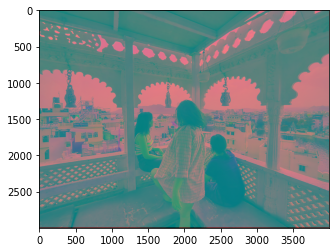

In [281]:
plt.imshow(DecAll)

SUm of squared error:  5530.351525897789


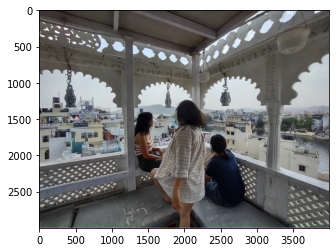

In [282]:
reImg = cv2.cvtColor(DecAll,cv2.COLOR_YCR_CB2BGR)
cv2.imwrite('Decompressed.jpg', reImg)
#cv2.SaveImage(,cv2.fromarray(reImg))
plt.figure()
img3=np.zeros(img.shape,np.uint8)
img3[:,:,0]=reImg[:,:,2]
img3[:,:,1]=reImg[:,:,1]
img3[:,:,2]=reImg[:,:,0]
plt.imshow(img3)
SSE=np.sqrt(np.sum((img2-img3)**2))
print("SUm of squared error: ",SSE)
plt.show()  

In [255]:
cv2.imwrite('reconstructed_jpeg_img6.png', img3)

True

In [30]:
##import math
##20 * math.log10(255.0 / math.sqrt(SSE))##img1     ## Answer:25.133571730052722

25.133571730052722

In [ ]:
##20 * math.log10(255.0 / math.sqrt(SSE))##img3
##SUm of squared error:  290.9604784158838   ## Answer: 23.492463587258207

23.492463587258207

In [ ]:
##20 * math.log10(255.0 / math.sqrt(SSE))##img5  ## Answer: 24.498634719616142

24.498634719616142

In [ ]:
##20 * math.log10(255.0 / math.sqrt(SSE))  ##img4  ## Answer: 23.782298740309713
##SUm of squared error:  272.176413379264

23.782298740309713

In [ ]:
##20 * math.log10(255.0 / math.sqrt(SSE))  # img2 ## Answer: 25.133571730052722

25.133571730052722

In [ ]:
##20 * math.log10(255.0 / math.sqrt(SSE)) ##img1 ## 25.133571730052722

25.133571730052722

In [31]:
from skimage.metrics import structural_similarity as ssim

In [85]:
imageA = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
imageB = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

In [86]:
s = ssim(imageA, imageB)

In [63]:
##print(s)  ## img 2

0.9985165564310678


In [34]:
##print(s)  ## img1

0.9985165564310678


In [87]:
##print(s) ## img 3

0.9898393374143969


In [ ]:
 ##print(s) ##img 4

0.9980587167189803


In [ ]:
##print(s)  ## img5

0.9957950897580261
